# **DATA UNDERSTANDING**

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

# pd.set_option('display.max_colwidth', 160)

In [2]:
# Read data
data = pd.read_csv('/content/text_emotion.csv')

In [3]:
# Print the head of the dataset
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [4]:
# Print the head of the dataset
data.tail()

,tweet_id,sentiment,author,content
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...
39999,1753919049,love,Alpharalpha,@mopedronin bullet train from tokyo the gf ...


In [5]:
# Take a sample to investiate
data.sample(10)

,tweet_id,sentiment,author,content
32286,1752255508,happiness,Knot2serious,"@Gilamuffin Sounds like a good time, very nice..."
19016,1966152865,hate,MARKSPICOLUK,@KrissyJill fuck. It's only in Canada right now.
32527,1752321848,fun,floridiantwist,@aramos82 yes! the pool opened this weekend
21471,1694239689,neutral,yuriyvolkov,????? http://is.gd/wxMt . ??????? ??? and may...
37246,1753451849,fun,jamesSK8R,@anamoorz yeh i do like playing sk8 but i dont...
804,1957149458,worry,AmbzMox,@letsgeticecream I miss you! Come to Michigan...
12217,1963502838,hate,LaurenERL,@marcosrivera08 I am very angry at this inform...
28294,1696136022,happiness,deberito,I am so happy. Keve is here for early Mother's...
13670,1964139665,sadness,carolyninaus,Holidays are now over - not fair!!
26477,1695411285,happiness,shutterbug1975,Today is Will's first baseball game! GO BATS!


There seem to be many mistakes in the sentences. This is problem for the analysis, and needs to be taken care of.

In [6]:
# Print the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
# Print summary statistics of the data
data.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [8]:
# Plot histogram of the target
data.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Emotions Normalized')

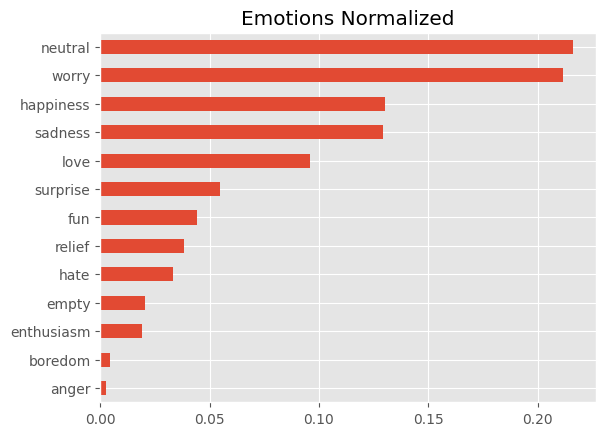

In [9]:
# Use ggplot style
plt.style.use('ggplot')

# Plot the value counts of emotions
data.sentiment.value_counts(normalize=True).sort_values(ascending=True).plot.barh()
plt.title('Emotions Normalized')

`Sentiment` has 13 emotion categories, and the `content` is the feature.

Since, most of the auhors tweeted only once in the dataset at hand, the `author` feature will be dropped.

`tweet_id` is unique as expected. However, there seem to be multiple tweets from the same `author` for some tweets. We may drop the `tweet_id` column for the analysis, since it is basically an index.

Some values in the `content` column appear more than once. There are same tweets for some of the tweet_ids.

There seems to be no missing values at all. I'll investigate further for missing values and wrong entries.

Data seems to be noisy.

# **DATA PREPROCESSING**

In [10]:
data = data.drop('author', axis=1)

In [11]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [12]:
#Dropping rows with other emotion labels

data = data.drop(data[data.sentiment == 'anger'].index)
data = data.drop(data[data.sentiment == 'boredom'].index)
data = data.drop(data[data.sentiment == 'enthusiasm'].index)
data = data.drop(data[data.sentiment == 'empty'].index)
data = data.drop(data[data.sentiment == 'fun'].index)
data = data.drop(data[data.sentiment == 'relief'].index)
data = data.drop(data[data.sentiment == 'surprise'].index)
data = data.drop(data[data.sentiment == 'love'].index)
data = data.drop(data[data.sentiment == 'hate'].index)
data = data.drop(data[data.sentiment == 'neutral'].index)
data = data.drop(data[data.sentiment == 'worry'].index)

data

,tweet_id,sentiment,content
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?
...,...,...,...
39986,1753905153,happiness,going to watch boy in the striped pj's hope i ...
39987,1753918809,happiness,"gave the bikes a thorough wash, degrease it an..."
39988,1753918818,happiness,"had SUCH and AMAZING time last night, McFly we..."
39994,1753918900,happiness,Succesfully following Tayla!!


In [13]:
data.sentiment.value_counts()

happiness    5209
sadness      5165
Name: sentiment, dtype: int64

In [14]:
#Making all letters lowercase
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
#Removing Punctuation, Symbols
data['content'] = data['content'].str.replace('[^\w\s]',' ')

<ipython-input-15-f54700c8f510>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace('[^\w\s]',' ')


In [16]:
import nltk
nltk.downloader.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
#Removing Stop Words using NLTK
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

To gain any proper insight, we need to get all the words to their root form, i.e the variants of a word within the text (for example plural forms, past tense, etc) must all be converted to the base word it represents. This is called lemmatisation.

In [18]:
import nltk
nltk.downloader.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
#Lemmatisation
from textblob import Word
data['content'] = data['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [20]:
#Correcting Letter Repetitions
import re
def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

In [21]:
data['content'] = data['content'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))

In [22]:
# Code to find the top 10,000 rarest words (modify according to your dataset) appearing in the data
freq = pd.Series(' '.join(data['content']).split()).value_counts()[-10000:]

In [23]:
# Removing all those rarely appearing words from the data
freq = list(freq.index)
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# **FEATURE EXTRACTION**

`Feature Extraction` i.e extracting some parameters from the data that can be presented numerically. This project will consider two different features, TF-IDF & Count Vectors (Numeric data for the math!).

In [24]:
#Encoding output labels 'sadness' as '1' & 'happiness' as '0'
from sklearn import preprocessing
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(data.sentiment.values)

In [25]:
# Splitting into training and testing data in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data.content.values, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [26]:
X_train.shape

(8299,)

`Term Frequency-Inverse Document Frequency (TF-IDF)`: This parameter gives the relative importance of a term in the data and is a measure of how frequently and rarely it appears in the text.

In [27]:
# Extracting TF-IDF parameters
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.fit_transform(X_val)

`Count Vectors`: This is another feature we consider and as the name suggests we transform our tweet into an array having the count of appearances of each word in it. The intuition here is that the text that conveys similar emotions may have the same words repeated over and over again. This is more like the direct approach.

In [28]:
# Extracting Count Vectors Parameters
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data['content'])
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

# **TRAINING MODELS**

The models trained will include the Multinomial Naive Bayes Classifier, Linear SVM, Logistic Regression, and Naive Bayes Classifier

**Using the `TF-IDF` features**

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Model 1: Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_val_tfidf)
print('Naive Bayes tfidf accuracy %s' % accuracy_score(y_pred, y_val))

Naive Bayes tfidf accuracy 0.516144578313253


In [31]:
# Model 2: Linear SVM
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_val_tfidf)
print('SVM using tfidf accuracy %s' % accuracy_score(y_pred, y_val))

SVM using tfidf accuracy 0.5171084337349398


In [32]:
# Model 3: logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_val_tfidf)
print('log reg tfidf accuracy %s' % accuracy_score(y_pred, y_val))

log reg tfidf accuracy 0.5127710843373494


In [33]:
# Model 4: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_val_tfidf)
print('random forest tfidf accuracy %s' % accuracy_score(y_pred, y_val))

random forest tfidf accuracy 0.5233734939759036


In [37]:
# Print Confusion Matrix
labels = np.unique(y_val)
cm =  confusion_matrix(y_val, y_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,0,1
0,601,441
1,548,485


Where 0 = Sadness
      1 = Happiness

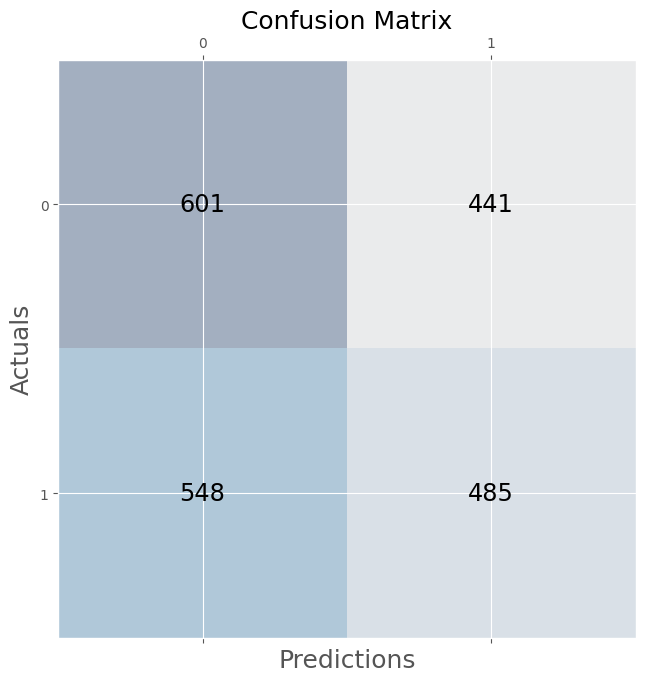

In [47]:
# cm.plot()
# plt.show()

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [48]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.58      0.55      1042
           1       0.52      0.47      0.50      1033

    accuracy                           0.52      2075
   macro avg       0.52      0.52      0.52      2075
weighted avg       0.52      0.52      0.52      2075



**Using the `Count Vectors` features**

In [49]:
# Model 1: Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_count, y_train)
y_pred = nb.predict(X_val_count)
print('naive bayes count vectors accuracy %s' % accuracy_score(y_pred, y_val))

naive bayes count vectors accuracy 0.7749397590361445


In [50]:
# Model 2: Linear SVM
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_count, y_train)
y_pred = lsvm.predict(X_val_count)
print('lsvm using count vectors accuracy %s' % accuracy_score(y_pred, y_val))

lsvm using count vectors accuracy 0.7918072289156627


In [51]:
# Model 3: Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_count, y_train)
y_pred = logreg.predict(X_val_count)
print('log reg count vectors accuracy %s' % accuracy_score(y_pred, y_val))

log reg count vectors accuracy 0.7975903614457831


In [52]:
# Model 4: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_count, y_train)
y_pred = rf.predict(X_val_count)
print('random forest count vectors accuracy %s' % accuracy_score(y_pred, y_val))

random forest count vectors accuracy 0.7706024096385542


In [53]:
# Print Confusion Matrix
labels = np.unique(y_val)
cm =  confusion_matrix(y_val, y_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,0,1
0,822,220
1,256,777


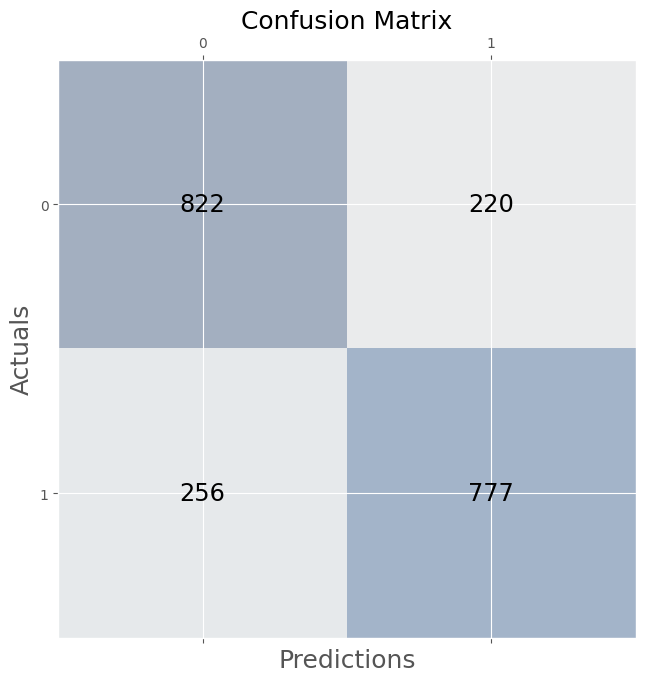

In [54]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [55]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1042
           1       0.78      0.75      0.77      1033

    accuracy                           0.77      2075
   macro avg       0.77      0.77      0.77      2075
weighted avg       0.77      0.77      0.77      2075



# **TESTING**

In [56]:
#Below are 8 random statements.
#The first 4 depict happiness
#The last 4 depict sadness

tweets = pd.DataFrame(['I am very happy today! The atmosphere looks cheerful',
                        'Things are looking great. It was such a good day',
                        'This is quite depressing. I am filled with sorrow',
                        'Success is right around the corner. Lets celebrate this victory',
                        'Now this is my worst, okay? But I am gonna get better.',
                        'I am tired, boss. Tired of being on the road, lonely as a sparrow in the rain. I am tired of all the pain I feel',
                        'His death broke my heart. It was a sad day'
                        'Everything is more beautiful when you experience them with a smile!',])

In [57]:
# Doing some preprocessing on these tweets as done before
tweets[0] = tweets[0].str.replace('[^\w\s]',' ')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets[0] = tweets[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
from textblob import Word
tweets[0] = tweets[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

<ipython-input-57-01df3021176d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets[0] = tweets[0].str.replace('[^\w\s]',' ')


In [58]:
# Extracting Count Vectors feature from our tweets
tweet_count = count_vect.transform(tweets[0])

In [59]:
#Predicting the emotion of the tweet using our already trained linear SVM
tweet_pred = logreg.predict(tweet_count)

In [60]:
print(tweet_pred)

[0 0 1 0 1 1 1]
